```
당뇨병 데이터에 대해
- 선형회귀, Ridge, Lasso, SV, RF, XG 방법으로 회귀
- 결정 계수, MSE, 예측치 등을 비교
```

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


```
1. Feature별로 target과 단일회귀를 하였을 경우의 결정계수(R Squared)와 
MSE 값을 구하세요.[20]
```

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
# 각 feature와 target의 선형회귀를 했을 때의 R squared value
for feature in df.columns[:-1]:
    X= df[feature].values.reshape(-1, 1)  # 2차원식으로 reshape하기
    lr.fit(X, diabetes.target)
    score= lr.score(X, diabetes.target)
    print(f'{feature}:{score:.4f}')

age:0.0353
sex:0.0019
bmi:0.3439
bp:0.1949
s1:0.0450
s2:0.0303
s3:0.1559
s4:0.1853
s5:0.3202
s6:0.1463


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, diabetes.target, test_size=0.1, random_state=2023
)
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
pred = lr.predict(X_test)
r2_score(y_test, pred), mean_squared_error(y_test, pred)

(0.17588919649668422, 5342.824697203742)

```
2. BMI와 target을 단일회귀를 하고,
산점도와 회귀선을 그리고 이미지를 복사하여 답안지에 붙여 넣으세요.[10]
```

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2023
)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

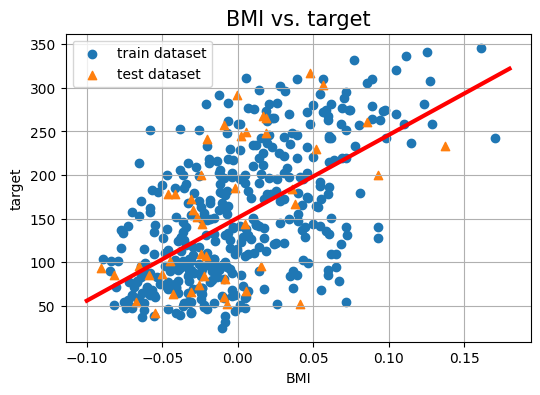

In [29]:
xs = np.array([-0.1, 0.18])
ys = np.dot(lr.coef_[0], xs) + lr.intercept_
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label='train dataset')
plt.plot(xs, ys, 'r-', lw=3)
plt.scatter(X_test, y_test, marker='^', label='test dataset')
plt.grid(), plt.legend()
plt.xlabel('BMI'), plt.ylabel('target')
plt.title('BMI vs. target', fontsize=15)
plt.show()

```
3. 모든 Feature를 독립변수로 가정하고 
5가지 이상의 종류를 사용하여 다중회귀를 한 후에 
회귀기(Regressor) 종류별로 결정계수(R Squared)와 MSE 값을 비교하세요..[20]
```

- 다중 선형 회귀 - feature를 모두 포함시켜서

In [30]:
X = df.iloc[:,:-1].values
y = df.target.values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2023
)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

- Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

- XGBoost

In [34]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

- Linear Regression

In [35]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

- 규제 선형회귀

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mes_rg = mean_squared_error(y_test, pred_rg)

- Lasso : 선형 회귀에 L1 규제 적용

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mes_ls = mean_squared_error(y_test, pred_ls)

- 비교

In [38]:
print('\t\tLR\tSV\tRF\tXG\tRG\tLS')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}\t{r2_rg:.4f}\t{r2_ls:.4f}')
print(f'Mean squared E\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xg:.2f}\t{mes_rg:.2f}\t{mes_ls:.2f}')

		LR	SV	RF	XG	RG	LS
R squared	0.5474	0.1736	0.4374	0.3298	0.4885	0.3414
Mean squared E	2934.28	5357.84	3647.41	4345.29	3316.07	4269.57
